# Clone GitHub-Repo

In [ ]:
!git clone https://github.com/julian-steiner-ai/forest-fire-smoke-detection.git

Cloning into 'forest-fire-smoke-detection'...
remote: Enumerating objects: 342, done.
remote: Counting objects: 100% (342/342), done.
remote: Compressing objects: 100% (197/197), done.
remote: Total 342 (delta 158), reused 320 (delta 138), pack-reused 0
Receiving objects: 100% (342/342), 20.04 MiB | 20.56 MiB/s, done.
Resolving deltas: 100% (158/158), done.


In [ ]:
%cd forest-fire-smoke-detection/

/content/forest-fire-smoke-detection


In [ ]:
!git submodule init
!git submodule update

Submodule 'tensorflow-models' (https://github.com/julian-steiner-ai/tensorflow-models.git) registered for path 'tensorflow-models'
Cloning into '/content/forest-fire-smoke-detection/tensorflow-models'...
Submodule path 'tensorflow-models': checked out 'f2e1a77e5952454fe761e5596785a125577f8105'


In [ ]:
!python -c "import tensorflow as tf;print(tf.reduce_sum(tf.random.normal([1000, 1000])))"

2022-12-17 23:59:22.124359: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-17 23:59:25.350561: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-17 23:59:27.097445: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-12-17 23:59:27.097518: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/tas

# Protobuf Installation/Compilation

In [ ]:
%cd /content/forest-fire-smoke-detection/tensorflow-models/research

/content/forest-fire-smoke-detection/tensorflow-models/research


In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

# COCO API installation

In [ ]:
%cd /content/

/content


In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 16.91 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
%cd cocoapi/PythonAPI

/content/cocoapi/PythonAPI


In [ ]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.8/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.8
creating build/temp.linux-x86_64-3.8/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.8/dist-packages/numpy/core/include -I../common -I/usr/include/python3.8 -c ../common/maskApi.c -o build/temp.linux-x86_64-3.8/../common/maskAp

In [ ]:
!cp -r pycocotools /content/forest-fire-smoke-detection/tensorflow-models/research

# Install the Object Detection API

In [ ]:
%cd /content/forest-fire-smoke-detection/tensorflow-models/research

/content/forest-fire-smoke-detection/tensorflow-models/research


In [ ]:
!cp object_detection/packages/tf2/setup.py .

In [ ]:
!python -m pip install --use-feature=2020-resolver .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/forest-fire-smoke-detection/tensorflow-models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 14.5 MB 22.6 MB/s 
     |████████████████████████████████| 352 kB 98.2 MB/s 
     |████████████████████████████████| 2.3 MB 89.9 MB/s 
     |████████████████████████████████| 26.9 MB 128 kB/s 
     |████████████████████████████████| 67 kB 7.9 MB/s 
     |████████████████████████████████| 662 kB 93.9 MB/s 
     |████████████████████████████████| 118 kB 105.9 MB/s 
     |██████████████████

# Test the Installation

In [ ]:
!python object_detection/builders/model_builder_tf2_test.py

2022-12-18 00:01:09.973374: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-18 00:01:10.112311: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-18 00:01:10.909693: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-12-18 00:01:10.909866: W tensorflow/compiler/xla/stream_executor

# Download Pre-Trained Model

You may need to go to config file and configure the config file and update the path.  

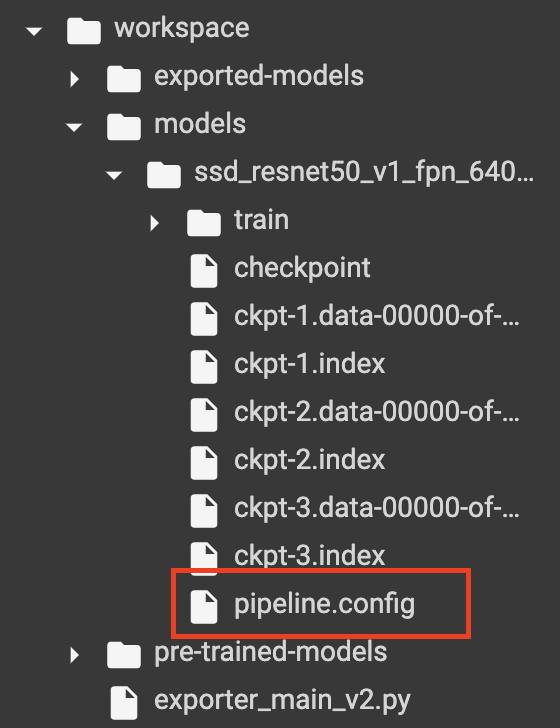

Update pipeline.config in the folder. just copy and paste the code in next cell with the text in the file.

In [ ]:
# pipeline.config file

# model {
#   ssd {
#     num_classes: 2
#     image_resizer {
#       fixed_shape_resizer {
#         height: 480
#         width: 480
#       }
#     }
#     feature_extractor {
#       type: "ssd_resnet50_v1_fpn_keras"
#       depth_multiplier: 1.0
#       min_depth: 16
#       conv_hyperparams {
#         regularizer {
#           l2_regularizer {
#             weight: 0.00039999998989515007
#           }
#         }
#         initializer {
#           truncated_normal_initializer {
#             mean: 0.0
#             stddev: 0.029999999329447746
#           }
#         }
#         activation: RELU_6
#         batch_norm {
#           decay: 0.996999979019165
#           scale: true
#           epsilon: 0.0010000000474974513
#         }
#       }
#       override_base_feature_extractor_hyperparams: true
#       fpn {
#         min_level: 3
#         max_level: 7
#       }
#     }
#     box_coder {
#       faster_rcnn_box_coder {
#         y_scale: 10.0
#         x_scale: 10.0
#         height_scale: 5.0
#         width_scale: 5.0
#       }
#     }
#     matcher {
#       argmax_matcher {
#         matched_threshold: 0.5
#         unmatched_threshold: 0.5
#         ignore_thresholds: false
#         negatives_lower_than_unmatched: true
#         force_match_for_each_row: true
#         use_matmul_gather: true
#       }
#     }
#     similarity_calculator {
#       iou_similarity {
#       }
#     }
#     box_predictor {
#       weight_shared_convolutional_box_predictor {
#         conv_hyperparams {
#           regularizer {
#             l2_regularizer {
#               weight: 0.00039999998989515007
#             }
#           }
#           initializer {
#             random_normal_initializer {
#               mean: 0.0
#               stddev: 0.009999999776482582
#             }
#           }
#           activation: RELU_6
#           batch_norm {
#             decay: 0.996999979019165
#             scale: true
#             epsilon: 0.0010000000474974513
#           }
#         }
#         depth: 256
#         num_layers_before_predictor: 4
#         kernel_size: 3
#         class_prediction_bias_init: -4.599999904632568
#       }
#     }
#     anchor_generator {
#       multiscale_anchor_generator {
#         min_level: 3
#         max_level: 7
#         anchor_scale: 4.0
#         aspect_ratios: 1.0
#         aspect_ratios: 2.0
#         aspect_ratios: 0.5
#         scales_per_octave: 2
#       }
#     }
#     post_processing {
#       batch_non_max_suppression {
#         score_threshold: 9.99999993922529e-09
#         iou_threshold: 0.6000000238418579
#         max_detections_per_class: 100
#         max_total_detections: 100
#         use_static_shapes: false
#       }
#       score_converter: SIGMOID
#     }
#     normalize_loss_by_num_matches: true
#     loss {
#       localization_loss {
#         weighted_smooth_l1 {
#         }
#       }
#       classification_loss {
#         weighted_sigmoid_focal {
#           gamma: 2.0
#           alpha: 0.25
#         }
#       }
#       classification_weight: 1.0
#       localization_weight: 1.0
#     }
#     encode_background_as_zeros: true
#     normalize_loc_loss_by_codesize: true
#     inplace_batchnorm_update: true
#     freeze_batchnorm: false
#   }
# }
# train_config {
#   batch_size: 64
#   data_augmentation_options {
#     random_horizontal_flip {
#     }
#   }
#   data_augmentation_options {
#     random_crop_image {
#       min_object_covered: 0.0
#       min_aspect_ratio: 0.75
#       max_aspect_ratio: 3.0
#       min_area: 0.75
#       max_area: 1.0
#       overlap_thresh: 0.0
#     }
#   }
#   sync_replicas: true
#   optimizer {
#     momentum_optimizer {
#       learning_rate {
#         cosine_decay_learning_rate {
#           learning_rate_base: 0.1
#           total_steps: 25000
#           warmup_learning_rate: 0.013333000242710114
#           warmup_steps: 2000
#         }
#       }
#       momentum_optimizer_value: 0.8999999761581421
#     }
#     use_moving_average: false
#   }
#   fine_tune_checkpoint: "pre-trained-models/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0"
#   num_steps: 2000
#   startup_delay_steps: 0.0
#   replicas_to_aggregate: 8
#   max_number_of_boxes: 100
#   unpad_groundtruth_tensors: false
#   fine_tune_checkpoint_type: "detection"
#   use_bfloat16: false
#   fine_tune_checkpoint_version: V2
# }
# train_input_reader {
#   label_map_path: "/content/forest-fire-smoke-detection/annotations/v2/label_map.pbtxt"
#   tf_record_input_reader {
#     input_path: "/content/forest-fire-smoke-detection/annotations/v2/train.record"
#   }
# }
# eval_config {
#   metrics_set: "coco_detection_metrics"
#   use_moving_averages: false
# }
# eval_input_reader {
#   label_map_path: "/content/forest-fire-smoke-detection/annotations/v2/label_map.pbtxt"
#   shuffle: false
#   num_epochs: 1
#   tf_record_input_reader {
#     input_path: "/content/forest-fire-smoke-detection/annotations/v2/test.record"
#   }
# }

Overview over [TensorFlow Models](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md)

In [24]:
%cd /content/forest-fire-smoke-detection/workspace/pre-trained-models

/content/forest-fire-smoke-detection/workspace/pre-trained-models


In [25]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

--2022-12-18 10:35:35--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.152.128, 2607:f8b0:4001:c56::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.152.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244817203 (233M) [application/x-tar]
Saving to: ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet50_v1_fpn 100%[===================>] 233.48M   208MB/s    in 1.1s    

2022-12-18 10:35:36 (208 MB/s) - ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [244817203/244817203]



In [26]:
!tar -xvf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/assets/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


# Training the Model

In [51]:
%cd /content

/content


In [52]:
%cp /content/forest-fire-smoke-detection/tensorflow-models/research/object_detection/model_main_tf2.py /content/forest-fire-smoke-detection/workspace/model_main_tf2.py

In [53]:
%cd /content/forest-fire-smoke-detection/workspace/

/content/forest-fire-smoke-detection/workspace


In [54]:
!pip install "opencv-python-headless<4.3"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
!pip install --upgrade tensorflow tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libcudnn8 is already the newest version (8.1.0.77-1+cuda11.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [57]:
!python model_main_tf2.py --model_dir=/content/forest-fire-smoke-detection/workspace/models/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8 --pipeline_config_path=/content/forest-fire-smoke-detection/workspace/models/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/pipeline.config

2022-12-18 11:43:54.587129: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-12-18 11:43:54.587249: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-12-18 11:43:54.587280: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2022-12-18 11:43:57.742607: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environme

# Exporting the Trained Model

In [58]:
%cp /content/forest-fire-smoke-detection/tensorflow-models/research/object_detection/exporter_main_v2.py /content/forest-fire-smoke-detection/workspace//exporter_main_v2.py

In [59]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/forest-fire-smoke-detection/workspace/models/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/pipeline.config --trained_checkpoint_dir /content/forest-fire-smoke-detection/workspace/models/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8 --output_directory /content/forest-fire-smoke-detection/workspace/exported-models/my_ssd_resnet50_v1_fpn

2022-12-18 11:45:10.710722: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-12-18 11:45:10.710831: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-12-18 11:45:10.710850: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2022-12-18 11:45:13.614331: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environme

In [60]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

%matplotlib inline

In [61]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path (this can be local or on colossus)

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [62]:
labelmap_path = '/content/forest-fire-smoke-detection/annotations/v2/label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)

In [63]:
tf.keras.backend.clear_session()
model = tf.saved_model.load(f'/content/forest-fire-smoke-detection/workspace/exported-models/my_ssd_resnet50_v1_fpn/saved_model/')

In [64]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

In [65]:
test_images = ['/content/forest-fire-smoke-detection/data/test/F_20.jpg',
               '/content/forest-fire-smoke-detection/data/test/ck0m0f8x4hwsq0838adn9hkti_jpeg.rf.02c20dbd46efee307ec38486fc3f5da2.jpg']

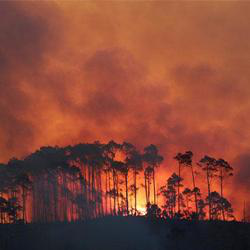

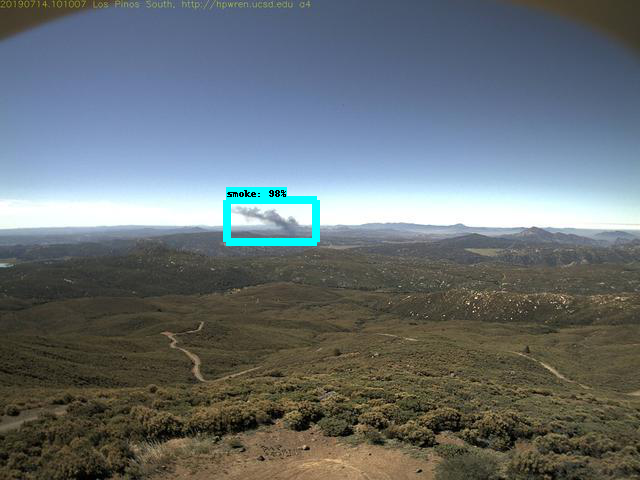

In [66]:
for image_path in test_images:
  image_np = load_image_into_numpy_array(image_path)
  output_dict = run_inference_for_single_image(model, image_np)
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)
  display(Image.fromarray(image_np))

In [67]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

%matplotlib inline

In [68]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path (this can be local or on colossus)

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  
  if image.mode == 'RGBA':
    image = image.convert('RGB')
  
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [69]:
version = 'v2'

In [70]:
# Google Colab
labelmap_path = '/content/forest-fire-smoke-detection/annotations/v2/label_map.pbtxt'

# # Local Jupyter Notebook
# labelmap_path = f'/home/steinerj/Documents/ai-b/semester-4/computer-vision/forest-fire-smoke-detection/annotations/{version}/label_map.pbtxt'
# category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)

In [71]:


tf.keras.backend.clear_session()

# Google Colab
model = tf.saved_model.load(f'/content/forest-fire-smoke-detection/workspace/exported-models/my_ssd_resnet50_v1_fpn/saved_model/')

# # Local Jupyter Notebook
# model = tf.saved_model.load(f'/home/steinerj/Documents/ai-b/semester-4/computer-vision/forest-fire-smoke-detection/workspace/exported-models/my_ssd_resnet50_v1_fpn_{version}/saved_model')

In [72]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

In [73]:
import pathlib

test_images = []
file_endings = ['png', 'jpg']

for file_ending in file_endings:
    test_images += list(pathlib.Path('/content/forest-fire-smoke-detection/data/test').glob(f"*{file_endings}"))

In [74]:
for image_path in test_images:
  image_np = load_image_into_numpy_array(str(image_path))
  output_dict = run_inference_for_single_image(model, image_np)
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)
  display(Image.fromarray(image_np))

Output hidden; open in https://colab.research.google.com to view.